## 1. Anomaly Detection (30 points)

**Part A (5 Points):**

By dividing a data set into quartiles, IQR is used to measure variability. The data is sorted ascending and divided into four equal parts. Q1, Q2, Q3, also known as the first, second, and third quartiles, are the values that separate the four equal parts.

Use the following data points to calculate outliers in the data
data = [11, 3, 8, 10, 12, 5, 1, 50]

Using a box plot, show the outliers in the box plot.

**Part B (5 points):**

Using the formula to calculate the Z-score detect outliers in the following data points.
data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]
Using a box plot, show the outliers in the box plot.

**Part C (20 points):**

Use the dataset attached for identifying the outliers using Z-score. 

Steps to follow in this question

- Step1(5 points): Show outliers using histograms and scatterplots. Then 

- Step2(7 points): Identify the outliers using Z-score for SalePrice column by using atleast 4 different thresholds.

- Step3(4 points): Print the number of outliers removed.

- Step4(4 points): Use LocalOutlierFactor as discussed in the class to plot the outliers from SalePrice and LotArea columns.

/var/folders/2d/kjz0bk3s5nj4p4v10t35f8f40000gn/T/ipykernel_75520/2007170832.py:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  q1, q2, q3 = np.percentile(data, [25, 50, 75], interpolation='linear')


<Axes: >

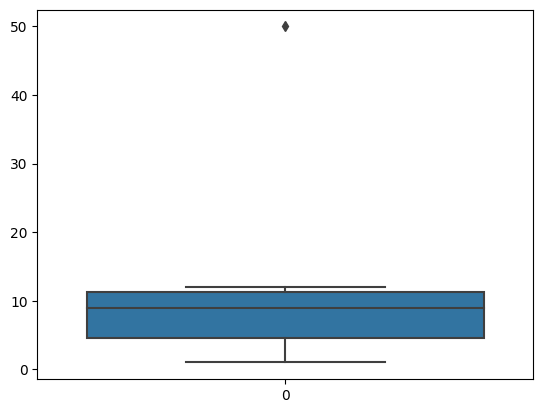

In [1]:
# PART A

import numpy as np
import seaborn as sns

data = [11, 3, 8, 10, 12, 5, 1, 50]

# Calculate Q1, Q2 (median), and Q3
q1, q2, q3 = np.percentile(data, [25, 50, 75], interpolation='linear')

# Calculate IQR
iqr = q3 - q1

# Calculate upper and lower bounds for outlier detection
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

# Find the outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

# Plot the boxplot
sns.boxplot(data=data)

<Axes: >

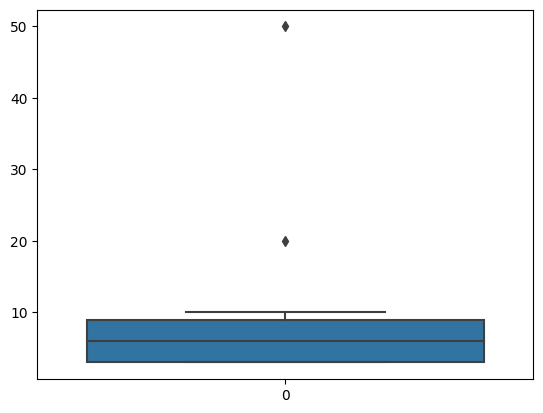

In [2]:
# PART B

import numpy as np
import seaborn as sns

data = [6, 3, 9, 6, 9, 20, 3, 10, 3, 50, 6, 5, 9, 9, 3, 6, 3]

# Calculate the Z-scores for the data
z_scores = np.abs((data - np.mean(data)) / np.std(data))

# Define a threshold for outlier detection
threshold = 3

# Find the outliers
outliers = [data[i] for i in range(len(data)) if z_scores[i] > threshold]

# Plot the boxplot
sns.boxplot(data=data)


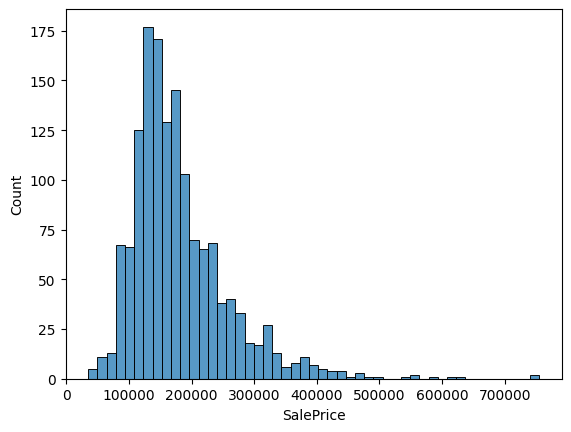

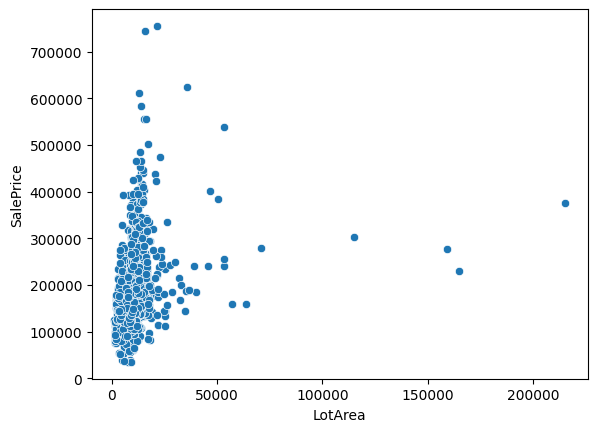

Number of outliers detected for Z-score threshold 3: 22
Number of outliers detected for Z-score threshold 4: 9
Number of outliers detected for Z-score threshold 5: 5
Number of outliers detected for Z-score threshold 6: 2
Number of outliers removed using Z-score threshold 5: 5


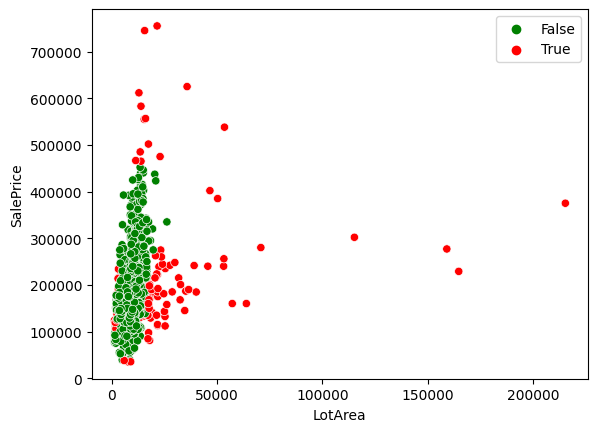

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Load the dataset
df = pd.read_csv('Q1_dataset.csv')

# Step 1: Show outliers using histograms and scatterplots
# Histogram of SalePrice
sns.histplot(data=df, x='SalePrice')
plt.show()

# Scatter plot of SalePrice vs LotArea
sns.scatterplot(data=df, x='LotArea', y='SalePrice')
plt.show()

# Step 2: Identify the outliers using Z-score for SalePrice column by using at least 4 different thresholds
# Z-score threshold 1
z_threshold_1 = 3
z_scores_1 = np.abs((df['SalePrice'] - np.mean(df['SalePrice'])) / np.std(df['SalePrice']))
outliers_z_1 = df['SalePrice'][z_scores_1 > z_threshold_1]
print(f"Number of outliers detected for Z-score threshold {z_threshold_1}: {len(outliers_z_1)}")

# Z-score threshold 2
z_threshold_2 = 4
z_scores_2 = np.abs((df['SalePrice'] - np.mean(df['SalePrice'])) / np.std(df['SalePrice']))
outliers_z_2 = df['SalePrice'][z_scores_2 > z_threshold_2]
print(f"Number of outliers detected for Z-score threshold {z_threshold_2}: {len(outliers_z_2)}")

# Z-score threshold 3
z_threshold_3 = 5
z_scores_3 = np.abs((df['SalePrice'] - np.mean(df['SalePrice'])) / np.std(df['SalePrice']))
outliers_z_3 = df['SalePrice'][z_scores_3 > z_threshold_3]
print(f"Number of outliers detected for Z-score threshold {z_threshold_3}: {len(outliers_z_3)}")

# Z-score threshold 4
z_threshold_4 = 6
z_scores_4 = np.abs((df['SalePrice'] - np.mean(df['SalePrice'])) / np.std(df['SalePrice']))
outliers_z_4 = df['SalePrice'][z_scores_4 > z_threshold_4]
print(f"Number of outliers detected for Z-score threshold {z_threshold_4}: {len(outliers_z_4)}")

# Step 3: Print the number of outliers removed
# Remove outliers using Z-score threshold 3
z_threshold = z_threshold_3
z_scores = z_scores_3
df_no_outliers_z = df[z_scores <= z_threshold]
num_outliers_z = len(df) - len(df_no_outliers_z)
print(f"Number of outliers removed using Z-score threshold {z_threshold}: {num_outliers_z}")

# Step 4: Use LocalOutlierFactor to plot the outliers from SalePrice and LotArea columns
# Extract the SalePrice and LotArea columns from the dataframe
X = df[['SalePrice', 'LotArea']]

# Fit the LocalOutlierFactor model
clf = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred = clf.fit_predict(X)

# Plot the outliers using red color
sns.scatterplot(data=X, x='LotArea', y='SalePrice', hue=y_pred == -1, palette=['green', 'red'])
plt.show()


## 2. PCA (35 points)

Accuracy Comparison for Logistic Regression model: before and after PCA.
Please follow the following steps:

  1. Seperate and standardize the disease classification dataset. (5 points)
  2. Do Eigen decomposition using any LA library of your choice. Display scree plot. (10 points)
  3. Primary Component Selection. (Select the first 6 components) (5 points)
  4. Projection in a New Feature Space. (5 points)
  5. Principal Component Analysis. (5 points)
  6. Compare the presision and recall for the data using logistic regression before and after PCA. (10 points)

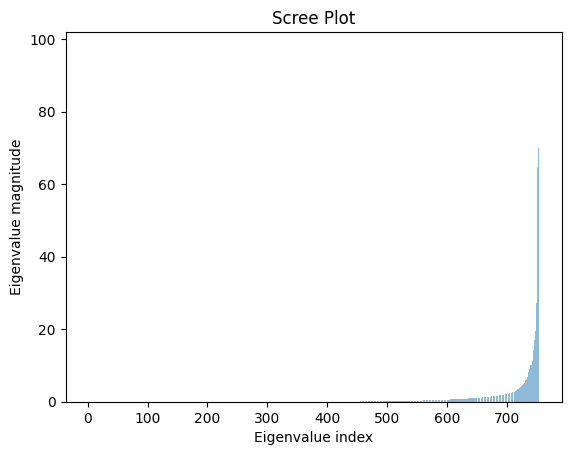

Original data - Precision: 0.8917, Recall: 0.9386
PCA data - Precision: 0.8661, Recall: 0.9649


In [4]:
## STEP 1

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Q2_dataset.csv')

# Separate the target column
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## STEP 2
import matplotlib.pyplot as plt
from numpy.linalg import eigh

# Compute the covariance matrix and perform eigen decomposition
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = eigh(cov_mat)

# Display scree plot
plt.bar(range(1, len(eigen_vals) + 1), eigen_vals, alpha=0.5, align='center')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue magnitude')
plt.title('Scree Plot')
plt.show()

## STEP 3
# Sort the eigenvalues and eigenvectors
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Select the first 6 components
w = np.hstack([eigen_pairs[i][1][:, np.newaxis] for i in range(6)])

## STEP 4
# Project the standardized dataset onto the new feature space
X_train_pca = X_train_std.dot(w)
X_test_pca = X_test_std.dot(w)

## STEP 5
from sklearn.decomposition import PCA
# Apply PCA to the standardized dataset
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## STEP 6
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score

# Logistic regression on the original standardized dataset
lr_orig = LogisticRegression(random_state=42, max_iter=1000)
lr_orig.fit(X_train_std, y_train)
y_pred_orig = lr_orig.predict(X_test_std)

# Logistic regression on the PCA-transformed dataset
lr_pca = LogisticRegression(random_state=42, max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

# Calculate and compare precision and recall scores
precision_orig = precision_score(y_test, y_pred_orig)
recall_orig = recall_score(y_test, y_pred_orig)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)

print(f"Original data - Precision: {precision_orig:.4f}, Recall: {recall_orig:.4f}")
print(f"PCA data - Precision: {precision_pca:.4f}, Recall: {recall_pca:.4f}")


## 3. EM Algorithm (35 points)

Etimate the probability distribution in a 1-dimensional dataset
There are two Normal distributions  𝑁(𝜇1,𝜎1^2) and 𝑁(𝜇2,𝜎2^2).
There are 5 paramaters to estimate: 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) where 𝑤 is the probability that the data comes from the first normal probability distribution and (1-𝑤) comes from the second normal probability distribution.
The probability density function (PDF) of the mixture model is: 𝑓(𝑥|𝜃)=𝑤 𝑓1(𝑥 | 𝜇1,𝜎1^2)+(1−𝑤) 𝑓2(𝑥 | 𝜇2,𝜎2^2)
Your goal is to best fit a given probability density by finding 𝜃=(𝑤,𝜇1,𝜎1^2,𝜇2,𝜎2^2) through EM iterations.

Using the following way to produce data:
```python
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

```

(1) Using a single Gaussion to estimate and draw a picure to see the result: (5 points)
```python
class Gaussian:
"Model univariate Gaussian"
def __init__(self, mu, sigma):
    #mean and standard deviation


#probability density function
def pdf(self, datum):
    "Probability of a data point given the current parameters"
```

(2) Using a 2 Gaussian mixture model to estimate and draw a picture to see the result(Do not use sklearn GaussianMixture): (30 points)
```python
class GaussianMixture_self:
"Model mixture of two univariate Gaussians and their EM estimation"

def __init__(self, data, mu_min=min(data), mu_max=max(data), sigma_min=1, sigma_max=1, mix=.5):


def Estep(self):
    "Perform an E(stimation)-step, assign each point to gaussian 1 or 2 with a percentage"

def Mstep(self, weights):
    "Perform an M(aximization)-step"

def iterate(self, N=1, verbose=False):
    "Perform N iterations, then compute log-likelihood"

def pdf(self, x):
        
```

In [5]:
import numpy as np
random_seed=36784765
np.random.seed(random_seed)

Mean1 = 9.0  # Input parameter, mean of first normal probability distribution
Standard_dev1 = 5.0 #@param {type:"number"}
Mean2 = 2.0 # Input parameter, mean of second normal  probability distribution
Standard_dev2 = 2.0 #@param {type:"number"}

# generate data
y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data=np.append(y1,y2)

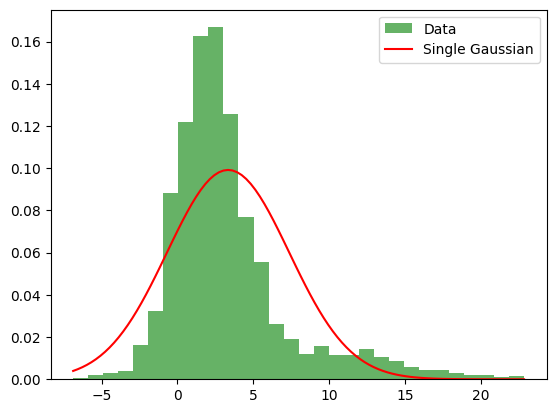

In [6]:
# (1) Using a single Gaussian to estimate and draw a picture to see the result:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class Gaussian:
    def __init__(self, mu, sigma):
        self.mu = mu
        self.sigma = sigma

    def pdf(self, datum):
        return norm.pdf(datum, self.mu, self.sigma)

# Generate data
random_seed = 36784765
np.random.seed(random_seed)
Mean1 = 9.0
Standard_dev1 = 5.0
Mean2 = 2.0
Standard_dev2 = 2.0

y1 = np.random.normal(Mean1, Standard_dev1, 500)
y2 = np.random.normal(Mean2, Standard_dev2, 2000)
data = np.append(y1, y2)

# Fit a single Gaussian
single_gaussian = Gaussian(np.mean(data), np.std(data))

# Plot the result
x = np.linspace(min(data), max(data), 100)
y = [single_gaussian.pdf(val) for val in x]

plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, y, 'r', label='Single Gaussian')
plt.legend()
plt.show()


Mu1: 2.20, Sigma1: 2.19, Mu2: 12.71, Sigma2: 3.38, Mix: 0.89
Mu1: 2.19, Sigma1: 2.20, Mu2: 12.36, Sigma2: 3.68, Mix: 0.89
Mu1: 2.17, Sigma1: 2.19, Mu2: 12.11, Sigma2: 3.83, Mix: 0.88
Mu1: 2.16, Sigma1: 2.17, Mu2: 11.91, Sigma2: 3.95, Mix: 0.88
Mu1: 2.14, Sigma1: 2.16, Mu2: 11.74, Sigma2: 4.04, Mix: 0.88
Mu1: 2.13, Sigma1: 2.15, Mu2: 11.59, Sigma2: 4.12, Mix: 0.87
Mu1: 2.12, Sigma1: 2.14, Mu2: 11.46, Sigma2: 4.18, Mix: 0.87
Mu1: 2.11, Sigma1: 2.13, Mu2: 11.35, Sigma2: 4.25, Mix: 0.87
Mu1: 2.11, Sigma1: 2.13, Mu2: 11.25, Sigma2: 4.30, Mix: 0.86
Mu1: 2.10, Sigma1: 2.12, Mu2: 11.15, Sigma2: 4.36, Mix: 0.86
Mu1: 2.10, Sigma1: 2.12, Mu2: 11.07, Sigma2: 4.41, Mix: 0.86
Mu1: 2.09, Sigma1: 2.11, Mu2: 10.98, Sigma2: 4.45, Mix: 0.86
Mu1: 2.09, Sigma1: 2.11, Mu2: 10.91, Sigma2: 4.50, Mix: 0.86
Mu1: 2.08, Sigma1: 2.11, Mu2: 10.83, Sigma2: 4.54, Mix: 0.86
Mu1: 2.08, Sigma1: 2.10, Mu2: 10.76, Sigma2: 4.58, Mix: 0.85
Mu1: 2.08, Sigma1: 2.10, Mu2: 10.68, Sigma2: 4.62, Mix: 0.85
Mu1: 2.07, Sigma1: 2.09,

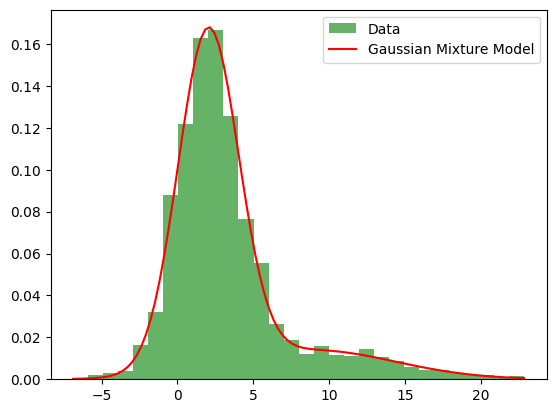

In [7]:
# (2) Using a 2 Gaussian mixture model to estimate and draw a picture to see the result:

from scipy.stats import norm

class GaussianMixture_self:
    def __init__(self, data, mu_min=None, mu_max=None, sigma_min=1, sigma_max=1, mix=.5):
        self.data = data
        self.one = Gaussian(mu_min, sigma_min)
        self.two = Gaussian(mu_max, sigma_max)
        self.mix = mix

    def Estep(self):
        self.weights = np.array([
            self.mix * self.one.pdf(datum) /
            (self.mix * self.one.pdf(datum) + (1 - self.mix) * self.two.pdf(datum))
            for datum in self.data
        ])

    def Mstep(self):
        self.one.mu = np.sum(self.weights * self.data) / np.sum(self.weights)
        self.one.sigma = np.sqrt(np.sum(self.weights * (self.data - self.one.mu)**2) / np.sum(self.weights))
        
        self.two.mu = np.sum((1 - self.weights) * self.data) / np.sum(1 - self.weights)
        self.two.sigma = np.sqrt(np.sum((1 - self.weights) * (self.data - self.two.mu)**2) / np.sum(1 - self.weights))
        
        self.mix = np.mean(self.weights)

    def iterate(self, N=1, verbose=False):
        for _ in range(N):
            self.Estep()
            self.Mstep()
            if verbose:
                print(f'Mu1: {self.one.mu:.2f}, Sigma1: {self.one.sigma:.2f}, Mu2: {self.two.mu:.2f}, Sigma2: {self.two.sigma:.2f}, Mix: {self.mix:.2f}')

    def pdf(self, x):
        return self.mix * self.one.pdf(x) + (1 - self.mix) * self.two.pdf(x)

# Fit the Gaussian Mixture Model
gmm = GaussianMixture_self(data, mu_min=np.min(data), mu_max=np.max(data))
gmm.iterate(N=50, verbose=True)

# Plot the result
x = np.linspace(min(data), max(data), 100)
y = [gmm.pdf(val) for val in x]

plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Data')
plt.plot(x, y, 'r', label='Gaussian Mixture Model')
plt.legend()
plt.show()
